# Social Network Analysis : Ego Networks


## Introduction
In this lesson, we shall move on with our discussion around identifying communities and also identifying the central nodes in communities. So we are essentially moving on from node centrality, community identification and now finding nodes of central importance in a community. This could be a challenging problem due to high level of randomness in social interaction networks (physical or on-line). We shall look at approach called the Ego networks that facilitate this approach. 

## Objectives

You will be able to:


- Identify Ego networks around specific individuals in a community
- Extract ego network with a given neighborhood radius 
- Understand Clustering Co-efficient and calculate in `networkx`
    

## Ego Networks

In our discussion around networks so far, we have considered a global structure of networks where the focus of analysis was on the whole network a a group. We explained interactions between different nodes in a network in terms of concentration of connections, direction of flow of information etc. This helped us understand and calculate different centrality measures of nodes, and detection of communities within a network. The networks , either directed or undirected , weighted or unweighted presented a holistic view of the network like the one shown below:

<img src="sofar.png" width=500>

__Ego networks__ (also known as __Personal Networks__ in a human social network analysis) consist of a focal node known as the __Ego__,  and the nodes to whom ego is directly connected to, called __Alters__, with edges showing links between ego to altars or between altars. Each alter in an ego network can have it's own ego network, and all ego networks interlock to form the social network. In such a network, egos could be human beings or objects like products or services in a business context. A simple ego network from an ego's perspective is shown below:

<img src="ego_n.png" width=500>




The focus of analysis in a ego network is on individual egos in turn. These focus on the structure, composition and shape of links between egos and altars in an attempt to identify the "Importance" of an ego node based on how its altars are connected to it and among themselves. 

In this type of analysis, each ego based network is treated as a world of its own. We do not consider the nodes and edges which are not present in the current ego network. This can be shown with a simple examples below:

<img src="egos_n.png" width=500>
So each ego network is treated as a __separate case__, independent of other unconnected elements in the network. 

## When to use Ego Network Analysis

Ego network analyses provide in-depth answers to otherwise complicated analytical questions. The applications of such analysis range from personal interaction analysis in human social networks to recommendation systems, which we shall look at in our next lab. 

- If your analytical question is about phenomena of or affecting individual entities across different settings (networks) use the ego-centric approach. Here the cases include Individuals, organizations, nations, etc.

- If, on the other hand, the analysis is about different patterns of interaction/association within defined groups
(networks) having an ego node, use the socio-centric approach. Cases here include finding who are the key nodes in a group, tracking information traversal in a group etc. 

### Ego networks and recommendation systems

For a business like amazon, involved in sales of a number of consumer products, ego networks can help us develop a simple yet powerful recommendation system for product recommendation based on customer's interest in a product, or purchase of a product. If we look at a transaction and identify the product e.g. a book, we can easily use ego network analysis to identify co-purchases with that book (i.e. other similar books purchased by users, who also purchase the book we are treating as an ego), this information can help us make effective item-item recommendations. 

<img src="books_n.jpg" width=600>

In our next lab, we will attempt to develop such a recommendation system using Ego Network Analysis. Let's first see how to extract ego networks in python. 

## Ego network Extraction in `networkx`

Below is a simple routine that creates a random Erdos Reyno graph and attempts to extract different ego networks from the point of view of a given node. let's first the a random network. 

### Create a random network 

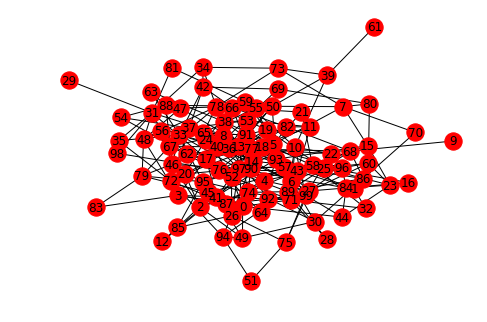

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# create some test network
graph = nx.erdos_renyi_graph(100, 0.05)
nx.draw(graph, with_labels=True)
plt.show();

## Extract Ego network for a given node

So above we see a partially connected graph with connection buult on given probability value i.e. 0.05. You can try different vaklues to see the impact on the output. 

Let's try to extract the ego network for node 0 using `nx.ego_graph()`

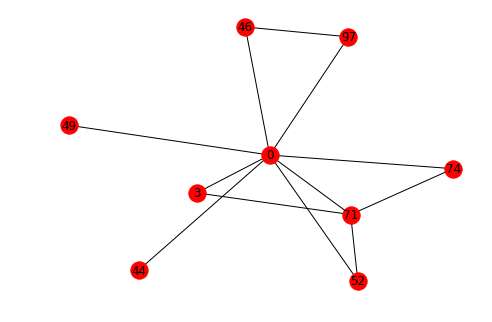

In [3]:
# create an ego-graph for some node
node = 0
ego_graph = nx.ego_graph(graph, node, radius=1)

# plot to check
nx.draw(ego_graph, with_labels=True)
plt.show();

So we see above that node 0 is now our ego node, and the network consists of all the nodes connected to node 0 with radius = 1 , i.e. sudden neighbors. For this ego, we see that altars are not interconnected. . Let's increase the radius to see the impact. 

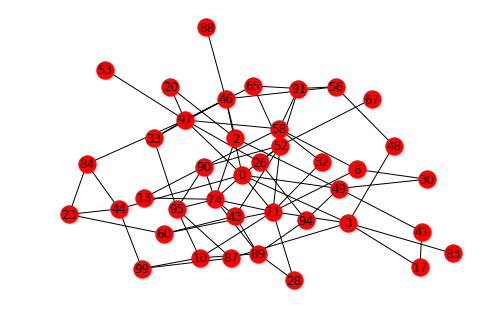

In [4]:
# create an ego-graph for some node
node = 0
ego_graph = nx.ego_graph(graph, node, radius=2)

# plot to check
nx.draw(ego_graph, with_labels=True)
plt.show();

Great, this is a bit more revealing. We can see a neighborhood with radius 2 and now some altars are interconnected to each other. We also see above that some nodes, which are not directly connected to the ego node are still included in this ego network as they are connected to the altars. we can similarly increase the radius even more to grow the world around the ego and how different entities in this world are interconnected. 

If we think of above network as titles of books and the link between these nodes to indicate co-purchases, such a network can come in handy for building a recommendation system as we shall soon see. 

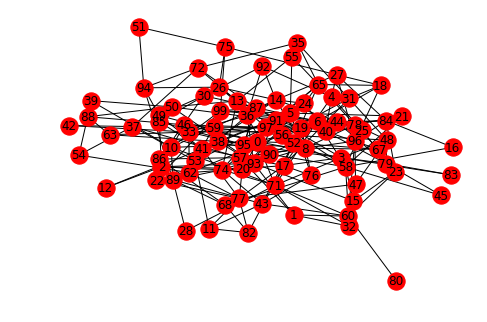

In [5]:
# create an ego-graph for some node
node = 0
ego_graph = nx.ego_graph(graph, node, radius=3)

# plot to check
nx.draw(ego_graph, with_labels=True)
plt.show();

So our ego network grows more complicated as we increase the radius. Studying such a network would require knowledge of the domain that these nodes belong to. 

## Clustering Co-efficient

Another metric for identifying important communities is called clustering coefficient, which measures the proportion of your friends that are also friends with each other (i.e., what amount of mutual trust people have for each other). This metric can be applied to entire networks but in a large network with widely varying        densities and multiple cores, average clustering is difficult to interpret. In ego networks, the interpretation is simple dense ego networks with a lot of mutual trust have a high clustering coefficient.
![](cc.png)

Let's pick up two random nodes from the graph we created above and see how we can calculate the clustering co-efficient for them using `nx.average_clustering()` method. 

In [6]:
# Calculate the clustering co-efficient 

node0 = nx.Graph(nx.ego_graph(graph, 2, radius=1))
node10 = nx.Graph(nx.ego_graph(graph, 10, radius=1))

nx.average_clustering(node0), nx.average_clustering(node10)

(0.0, 0.25595238095238093)

We see that node 0 has a 0 clustering co_efficient, node 10 has higher value of 0.47 i.e. nodes connected to node 10 are interconnected to some degree.  This can be visualized below:

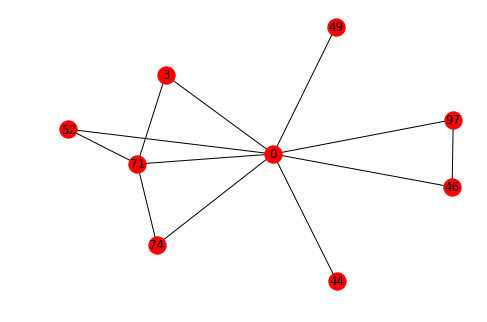

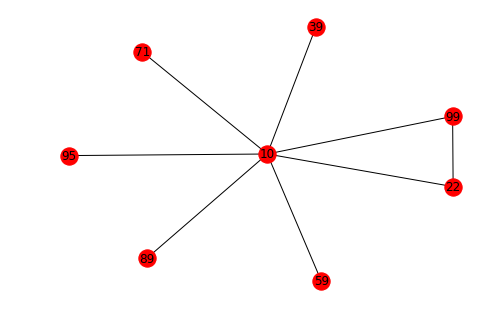

In [7]:
# create an ego-graph for some node
node = 0
ego_graph = nx.ego_graph(graph, node, radius=1)

# plot to check
nx.draw(ego_graph, with_labels=True); plt.show()

# create an ego-graph for some node
node = 10
ego_graph = nx.ego_graph(graph, node, radius=1)

# plot to check
nx.draw(ego_graph, with_labels=True)
plt.show();

So the fact that node 10 is connected to more altars which are interconnected to each other than node 0 gives node a higher clustering co-efficient.

## Additional Resources

- https://bookdown.org/chen/snaEd/ego-intro.html
- http://www.analytictech.com/networks/egonet.htm
- https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/

## Summary 
In this lesson we looked at the ego networks for identifying the central characters in a large social network. We looked at developing an intuition around development of recommendation systems using this approach. Next We shall apply this approach towards developing a Recommendation System for Amazon.  